In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

# Epidemics and unstable filters

The propagation mechanism of an epidemic such as the COVID19 can be roughly modeled as a feedback loop with postive gain or, in signal processing terms, as an unstable recursive filter. The idea is that, once an infected individual is inserted in a group of healthy individuals, he or she will infect on averge $R_0$ healthy individuals per unit of time (say, per day) who, in turn, will infect $R_0$ patients _each_ the next day. The constant $R_0$ is called the **basic reproduction number** for a virus.

As an oversimplification, consider an infinite supply of healthy individuals and a single patient zero arriving at time $n=0$; the number of infected people per day will  be:

$$y[n] = \delta[n] + R_0 y[n-1]$$

Of course this model neglects the duration of the infection (i.e. everyone stays sick forever) and the fact that at a certain point infected people will mostly be in contact with other infected people, but it demonstrates the basic exponential trend of the infection.

From a signal processing point of view, this can be implemented with a first order IIR filter whose single pole corresponds to $R_0$; for values of $R_0 < 1$ the epidemics will die out, whereas for $R_0 > 1$, the propagation will be exponential.

In [3]:
def contagion(R0, N):
    return sp.lfilter([1], [1, -R0], np.r_[1, np.zeros(N-1)])

It is estimated for COVID19 $R_0 \approx 2.5$; with this value, the model reaches a value of a billion newly infected individuals after the 24th day:

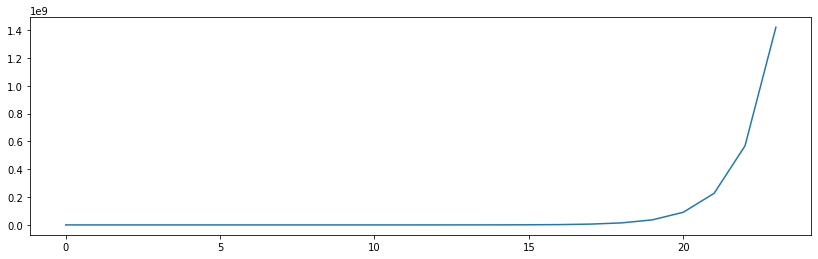

In [4]:
plt.plot(contagion(2.5, 24));

The actual infectiousness of COVID19, however, is not constant in time but follows a curve that rises and falls with the duration of the sickness, as shown in this figure ([source](https://medium.com/@tomaspueyo/coronavirus-the-hammer-and-the-dance-be9337092b56)):

![title](covid.png)

We can model this with an IIR filter with a longer feedback loop like so:

In [5]:
def covid(N):
    h = np.array([1, -.1, -.15, -.25, -.26, -.34, -.42, -.25, -.2, -.15, -.1, -.1, -.1])
    return sp.lfilter([1], h, np.r_[1, np.zeros(N-1)])

and we can see that, with this less aggressive pattern, the number of newly infected people per day grows much more slowly at first...

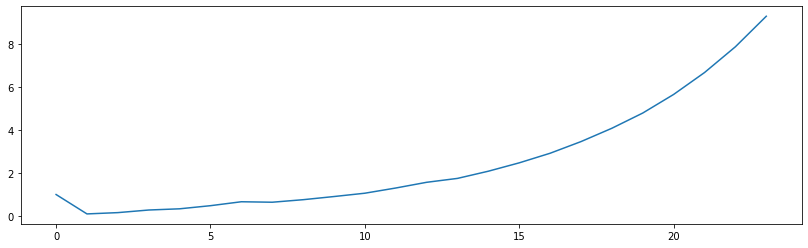

In [6]:
plt.plot(covid(24));

... but the exponential trend is there and it will inexorably lead to disaster: it will take 140 days but in the end we will reach the billion mark.

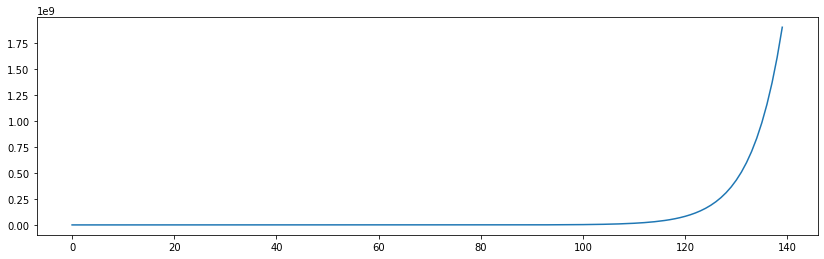

In [7]:
plt.plot(covid(140));

The idea of social distancing is predicated on the fact that $R_0$ is proportional to the number of encounters of a sick individual. By reducing the latter, we implicitly reduce the overall reproduction number. Let's assume that we can reduce the social interaction of every individual by a factor $q_f$:

In [8]:
def covid_q(N, qf):
    h = qf * np.array([1/qf, -.1, -.15, -.25, -.26, -.34, -.42, -.25, -.2, -.15, -.1, -.1, -.1])
    return sp.lfilter([1], h , np.r_[1, np.ones(N-1)])

With this, let's look at the how many new infections per day we have after 140 days: with a reduction of social activity by 25% we have this

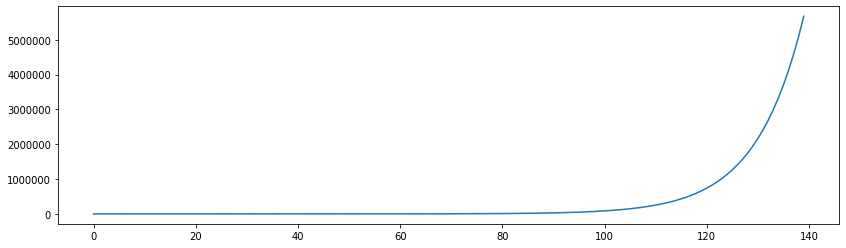

In [9]:
plt.plot(covid_q(140, 0.75));

Whereas by reducing social contact by 50% we have this:

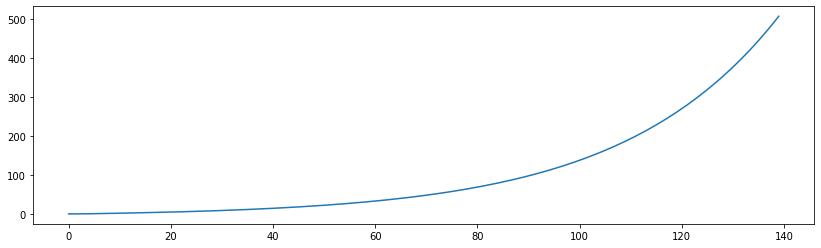

In [10]:
plt.plot(covid_q(140, 0.5));

Of course the trends are still exponential, but this slower growth rate is what buys us "time" to act on the infrastructure of the health care system and on the research for new therapies.